<a href="https://colab.research.google.com/github/EvidenceN/DS-Unit-1-Build/blob/master/2016_Student_Default_Rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Goals/Objectives/Questions that could be explored**
- Student default rate by state
- top 10 states with most default rate
- how much money in default more than 240 days in each state
- top 10 states with most money in default.
- Is there a correlation between most default rate and how much money is in default?

- A - Number of borrowers who entered repayment status in 2014 - 2015
- B - Borrowers from Col (A) in default on June 30, 2016.
- C - Cohort Default Rate (B/A) Percentage
- D - Total Borrowers in Default >= 240 days
- E - Total Principal Outstanding On Loans in Default >= 240 days. 
- ST - State. 

In [163]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# Importing tools for data analysis and graphing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [165]:
# reading csv file
default16 = pd.read_csv("/content/drive/My Drive/Data Science Lambda/Unit 1: Statistics Fundamentals/Week 4: DS Unit 1 Build/Raw Data/2016_default_rate.csv")
print(default16.shape)
default16.head()

(1646, 12)


,Serial,OPEID,Institution Name,Address,City,ST,Zip,A,B,C,D,E
0,1,100200,Alabama Agricultural & Mechanical University,4900 Meridian Street,Normal,AL,35762-1357,100,37,37%,1647,1346609
1,6,100500,Alabama State University,915 South Jackson Street,Montgomery,AL,36104-5714,57,31,54.39%,1707,1614552
2,13,100900,Auburn University,107 Samford Hall,Auburn,AL,36849-5113,424,35,8.25%,331,919069
3,14,831000,Auburn University Montgomery,7440 East Drive,Montgomery,AL,36117-3596,120,25,20.83%,238,650924
4,16,101200,Birmingham-Southern College,900 Arkadelphia Road,Birmingham,AL,35254-0002,67,8,11.94%,126,398389


In [166]:
# checking the end of the data
default16.tail()

,Serial,OPEID,Institution Name,Address,City,ST,Zip,A,B,C,D,E
1641,4561,392600,University of Wisconsin - Whitewater,800 West Main Street,Whitewater,WI,53190-1792,731,51,6.98%,506,879044
1642,4562,391100,Viterbo University,900 Viterbo Drive,La Crosse,WI,54601-4777,62,11,17.74%,65,206283
1643,4577,393200,University of Wyoming,Department 3434,Laramie,WY,82071-2000,334,40,11.98%,284,724451
1644,4579,915700,WyoTech,1889 Venture Drive,Laramie,WY,82070-9049,424,225,53.07%,3589,6633926
1645,4616,394600,University of the Virgin Islands,#2 John Brewers Bay,St. Thomas,VI,00802-9990,12,4,33.33%,44,53976


In [0]:
# dropping columns that won't be used. 
default16 = default16.drop(['Serial', 'OPEID', 'Institution Name', 
                     'Address', 'City', 'Zip', 'C'], axis=1)

In [168]:
# checking to make sure integers and objects are properly classified
default16.dtypes

ST    object
A      int64
B      int64
D      int64
E      int64
dtype: object

In [169]:
# creating a function to filter the data set into individual states. 
# trial code to verify the function once it is created. 
al = default16[default16['ST']=='AL']
print(al.shape)
al.head()

(23, 5)


,ST,A,B,D,E
0,AL,100,37,1647,1346609
1,AL,57,31,1707,1614552
2,AL,424,35,331,919069
3,AL,120,25,238,650924
4,AL,67,8,126,398389


In [170]:
default16.tail()

,ST,A,B,D,E
1641,WI,731,51,506,879044
1642,WI,62,11,65,206283
1643,WY,334,40,284,724451
1644,WY,424,225,3589,6633926
1645,VI,12,4,44,53976


**State Abbreviations:** 
    Alabama - AL,
    Alaska - AK,
    Arizona - AZ,
    Arkansas - AR,
    California - CA,
    Colorado - CO,
    Connecticut - CT,
    Delaware - DE,
    Washington DC - DC
    Florida - FL,
    Georgia - GA,
    Hawaii - HI,
    Idaho - ID,
    Illinois - IL,
    Indiana - IN,
    Iowa - IA,
    Kansas - KS,
    Kentucky - KY,
    Louisiana - LA,
    Maine - ME,
    Maryland - MD,
    Massachusetts - MA,
    Michigan - MI,
    Minnesota - MN,
    Mississippi - MS,
    Missouri - MO,
    Montana - MT,
    Nebraska - NE,
    Nevada - NV,
    New Hampshire - NH,
    New Jersey - NJ,
    New Mexico - NM,
    New York - NY,
    North Carolina - NC,
    North Dakota - ND,
    Ohio - OH,
    Oklahoma - OK,
    Oregon - OR,
    Pennsylvania - PA,
    Rhode Island - RI,
    South Carolina - SC,
    South Dakota - SD,
    Tennessee - TN,
    Texas - TX,
    Utah - UT,
    Vermont - VT,
    Virginia - VA,
    Washington - WA,
    West Virginia - WV,
    Wisconsin - WI,
    Wyoming - WY,
    Virgin Islands - VI


In [0]:
# creating a function to filter the data set into individual states. 
# I observed alaska is not among the states

def default_by_state(dataframe):
  al = dataframe[dataframe['ST']=='AL']
  ak = dataframe[dataframe['ST']=='AK']
  az = dataframe[dataframe['ST']=='AZ']
  ar = dataframe[dataframe['ST']=='AR']
  ca = dataframe[dataframe['ST']=='CA']
  co = dataframe[dataframe['ST']=='CO']
  ct = dataframe[dataframe['ST']=='CT']
  de = dataframe[dataframe['ST']=='DE']
  dc = dataframe[dataframe['ST']=='DC']
  fl = dataframe[dataframe['ST']=='FL']
  ga = dataframe[dataframe['ST']=='GA']
  hi = dataframe[dataframe['ST']=='HI']
  ID = dataframe[dataframe['ST']=='ID']
  IL = dataframe[dataframe['ST']=='IL']
  IN = dataframe[dataframe['ST']=='IN']
  IA = dataframe[dataframe['ST']=='IA']
  KS = dataframe[dataframe['ST']=='KS']
  KY = dataframe[dataframe['ST']=='KY']
  LA = dataframe[dataframe['ST']=='LA']
  ME = dataframe[dataframe['ST']=='ME']
  MD = dataframe[dataframe['ST']=='MD']
  MA = dataframe[dataframe['ST']=='MA']
  MI = dataframe[dataframe['ST']=='MI']
  MN = dataframe[dataframe['ST']=='MN']
  MS = dataframe[dataframe['ST']=='MS']
  MO = dataframe[dataframe['ST']=='MO']
  MT = dataframe[dataframe['ST']=='MT']
  NE = dataframe[dataframe['ST']=='NE']
  NV = dataframe[dataframe['ST']=='NV']
  NH = dataframe[dataframe['ST']=='NH']
  NJ = dataframe[dataframe['ST']=='NJ']
  NM = dataframe[dataframe['ST']=='NM']
  NY = dataframe[dataframe['ST']=='NY']
  NC = dataframe[dataframe['ST']=='NC']
  ND = dataframe[dataframe['ST']=='ND']
  OH = dataframe[dataframe['ST']=='OH']
  OK = dataframe[dataframe['ST']=='OK']
  OR = dataframe[dataframe['ST']=='OR']
  PA = dataframe[dataframe['ST']=='PA']
  RI = dataframe[dataframe['ST']=='RI']
  SC = dataframe[dataframe['ST']=='SC']
  SD = dataframe[dataframe['ST']=='SD']
  TN = dataframe[dataframe['ST']=='TN']
  TX = dataframe[dataframe['ST']=='TX']
  UT = dataframe[dataframe['ST']=='UT']
  VT = dataframe[dataframe['ST']=='VT']
  VA = dataframe[dataframe['ST']=='VA']
  WA = dataframe[dataframe['ST']=='WA']
  WV = dataframe[dataframe['ST']=='WV']
  WI = dataframe[dataframe['ST']=='WI']
  WY = dataframe[dataframe['ST']=='WY']
  VI = dataframe[dataframe['ST']=='VI']
  return (al, ak, az, ar, ca, co, ct, de, dc, fl, ga, hi, ID, IL, 
          IN, IA, KS, KY, LA, ME, MD, MA, MI, MN, MS, MO, MT, NE, NV, NH, NJ, 
          NM, NY, NC, ND, OH, OK, OR, PA, RI, SC, SD, TN, TX, UT, VT, VA, WA, WV, 
          WI, WY, VI)


In [172]:
# Testing the function above and verifying that the state has been filtered as desired.
al = default_by_state(default16)[0]
al.head()


,ST,A,B,D,E
0,AL,100,37,1647,1346609
1,AL,57,31,1707,1614552
2,AL,424,35,331,919069
3,AL,120,25,238,650924
4,AL,67,8,126,398389


In [0]:
# assigning variables to the results of the function so that 
# it can easily be accessed later. 
# -16 Indicates that this dataset is from the 2016 data set.
# In the future, there is a possibility that data from other years 
# like 2010, or 2005 will be analyzed. There need to be an 
# easy naming convention to quickly identify which
# year each data set is from. 

alabama16 = default_by_state(default16)[0]
alaska16 = default_by_state(default16)[1]
arizona16 = default_by_state(default16)[2]
arkansas16 = default_by_state(default16)[3]
california16 = default_by_state(default16)[4]
colorado16 = default_by_state(default16)[5]
connecticut16 = default_by_state(default16)[6]
delaware16 = default_by_state(default16)[7]
washingtondc16 = default_by_state(default16)[8]
florida16 = default_by_state(default16)[9]
georgia16 = default_by_state(default16)[10]
hawaii16 = default_by_state(default16)[11]
idaho16 = default_by_state(default16)[12]
illinois16 = default_by_state(default16)[13]
indiana16 = default_by_state(default16)[14]
iowa16 = default_by_state(default16)[15]
kansas16 = default_by_state(default16)[16]
kentucky16 = default_by_state(default16)[17]
louisiana16 = default_by_state(default16)[18]
maine16 = default_by_state(default16)[19]
maryland16 = default_by_state(default16)[20]
massachusetts16 = default_by_state(default16)[21]
michigan16 = default_by_state(default16)[22]
minnesota16 = default_by_state(default16)[23]
mississippi16 = default_by_state(default16)[24]
missouri16 = default_by_state(default16)[25]
montana16 = default_by_state(default16)[26]
nebraska16 = default_by_state(default16)[27]
nevada16 = default_by_state(default16)[28]
new_hampshire16 = default_by_state(default16)[29]
new_jersey16 = default_by_state(default16)[30]
new_mexico16 = default_by_state(default16)[31]
new_york16 = default_by_state(default16)[32]
north_carolina16 = default_by_state(default16)[33]
north_dakota16 = default_by_state(default16)[34]
ohio16 = default_by_state(default16)[35]
oklahoma16 = default_by_state(default16)[36]
oregon16 = default_by_state(default16)[37]
pennsylvania16 = default_by_state(default16)[38]
rhode_island16 = default_by_state(default16)[39]
south_carolina16 = default_by_state(default16)[40]
south_dakota16 = default_by_state(default16)[41]
tennessee16 = default_by_state(default16)[42]
texas16 = default_by_state(default16)[43]
utah16 = default_by_state(default16)[44]
vermont16 = default_by_state(default16)[45]
virginia16 = default_by_state(default16)[46]
washington16 = default_by_state(default16)[47]
west_virginia16 = default_by_state(default16)[48]
wisconsin16 = default_by_state(default16)[49]
wyoming16 = default_by_state(default16)[50]
virgin_islands16 = default_by_state(default16)[51]

In [174]:
# testing each variable above to make sure the correct dataframe is stored under the correct variable
virgin_islands16

,ST,A,B,D,E
1645,VI,12,4,44,53976


In [0]:
# function to do "default rate" summary calculations on each state
# And then create a dataframe for each state using the results of the 
# calculation

def default_rate(state, state_name):
  ''' 
    A - Number of borrowers who entered repayment status in 2014 - 2015
    B - Borrowers from Col (A) in default on June 30, 2016.
    C - Cohort Default Rate (B/A) Percentage
    D - Total Borrowers in Default >= 240 days
    E - Total Principal Outstanding On Loans in Default >= 240 days.
    ST - State.
  '''

  # Number of borrowers who entered repayment status in 2014 - 2015 for each state
  total_borrowers = sum(state['A'])

  # Borrowers who entered repayment in 2014-2015 but in 
  # default on June 30, 2016 for the whole state.
  default_borrowers = sum(state['B'])

  # this is the equivalent of column 'C' but for the whole state. 
  # Cohort Default Rate (default borrowers/number of borrowers) Percentage
  default_rate = round((default_borrowers/total_borrowers)*100)

  # Total Borrowers in Default >= 240 days for each state
  default_borrowers_240 = sum(state['D'])

  # Total Principal Outstanding On Loans in Default >= 240 days for each state
  default_money_240 = sum(state['E'])

  index = state_name
  
  state_df = pd.DataFrame({'total borrowers': [total_borrowers], 
                           'default borrowers': [default_borrowers], 
                           'default rate %':[default_rate], 
                           'total default >= 8  months': [default_borrowers_240], 
                           'total default money >= 8 months': [default_money_240]}, 
                          index=[index])

  return state_df

In [176]:
# Default rate Function testing
alabama2016 = default_rate(alabama16, 'Alabama')
alabama2016

,total borrowers,default borrowers,default rate %,total default >= 8 months,total default money >= 8 months
Alabama,3060,625,20,10626,17258168


In [0]:
# creating variables that contain the dataframe of default rate for each state
# The goal is to eventually merge/join all these individual state dataframe
# into one big dataframe having one big dataframe that contains all the 
# summary will make it easier to create visualization. 

alabama2016 = default_rate(alabama16, 'Alabama')
#alaska2016 = default_rate(alaska16, 'Alaska') No data for alaska
arizona2016 = default_rate(arizona16, 'Arizona')
arkansas2016 = default_rate(arkansas16, 'Arkansas')
california2016 = default_rate(california16, 'California')
colorado2016 = default_rate(colorado16, 'Colorado')
connecticut2016 = default_rate(connecticut16, 'Connecticut')
delaware2016 = default_rate(delaware16, 'Delaware')
washingtondc2016 = default_rate(washingtondc16, 'Washington DC')
florida2016 = default_rate(florida16, 'Florida')
georgia2016 = default_rate(georgia16, 'Georgia')
hawaii2016 = default_rate(hawaii16, 'Hawaii')
idaho2016 = default_rate(idaho16, 'Idaho')
illinois2016 = default_rate(illinois16, 'Illinois')
indiana2016 = default_rate(indiana16, 'Indiana')
iowa2016 = default_rate(iowa16, 'Iowa')
kansas2016 = default_rate(kansas16, 'Kansas')
kentucky2016 = default_rate(kentucky16, 'Kentucky')

louisiana2016 = default_rate(louisiana16, 'Louisiana')
maine2016 = default_rate(maine16, 'Maine')
maryland2016 = default_rate(arizona16, 'Maryland')
massachusetts2016 = default_rate(massachusetts16, 'Massachusetts')
michigan2016 = default_rate(michigan16, 'Michigan')
minnesota2016 = default_rate(minnesota16, 'Minnesota')
mississippi2016 = default_rate(mississippi16, 'Mississippi')
missouri2016 = default_rate(missouri16, 'Missouri')
montana2016 = default_rate(montana16, 'Montana')
nebraska2016 = default_rate(nebraska16, 'Nebraska')
nevada2016 = default_rate(nevada16, 'Nevada')
new_hampshire2016 = default_rate(new_hampshire16, 'New Hampshire')

new_jersey2016 = default_rate(new_jersey16, 'New Jersey')
new_mexico2016 = default_rate(new_mexico16, 'New Mexico')
new_york2016 = default_rate(new_york16, 'New York')
north_carolina2016 = default_rate(north_carolina16, 'North Carolina')
north_dakota2016 = default_rate(north_dakota16, 'North Dakota')
ohio2016 = default_rate(ohio16, 'Ohio')
oklahoma2016 = default_rate(oklahoma16, 'Oklahoma')
oregon2016 = default_rate(oregon16, 'Oregon')
pennsylvania2016 = default_rate(pennsylvania16, 'Pennsylvania')
rhode_island2016 = default_rate(rhode_island16, 'Rhode Island')
south_carolina2016 = default_rate(south_carolina16, 'South Carolina')
south_dakota2016 = default_rate(south_dakota16, 'South Dakota')

tennessee2016 = default_rate(tennessee16, 'Tennessee')
texas2016 = default_rate(texas16, 'Texas')
utah2016 = default_rate(utah16, 'Utah')
vermont2016 = default_rate(vermont16, 'Vermont')
virginia2016 = default_rate(virginia16, 'Virginia')
washington2016 = default_rate(washington16, 'Washington')
west_virginia2016 = default_rate(west_virginia16, 'West Virginia')
wisconsin2016 = default_rate(wisconsin16, 'Wisconsin')
wyoming2016 = default_rate(wyoming16, 'Wyoming')
virgin_islands2016 = default_rate(virgin_islands16, 'Virgin_Islands')

In [0]:
# Now, merge all the dataframe summary results from each state into
# one big giant dataframe. This final dataframe will be used for
# data visualization and also provide a quick glance at the summary
# of student loan default rate by state. 

all_states = pd.concat([alabama2016, arizona2016, arkansas2016, california2016, colorado2016,
                        connecticut2016, delaware2016, washingtondc2016, florida2016, 
                        georgia2016, hawaii2016, idaho2016, illinois2016, indiana2016,
                        iowa2016, kansas2016, kentucky2016, louisiana2016, maine2016, maryland2016,
                        massachusetts2016, michigan2016, minnesota2016, mississippi2016, missouri2016,
                        montana2016, nebraska2016, nevada2016, new_hampshire2016, new_jersey2016, 
                        new_mexico2016, new_york2016, north_carolina2016, north_dakota2016,
                        ohio2016, oklahoma2016, oregon2016, pennsylvania2016, rhode_island2016, 
                        south_carolina2016, south_dakota2016, tennessee2016, texas2016, utah2016,
                        vermont2016, virginia2016, washington2016, west_virginia2016, wisconsin2016, wyoming2016, virgin_islands2016])
all_states = all_states.reset_index()

In [179]:
all_states

,index,total borrowers,default borrowers,default rate %,total default >= 8 months,total default money >= 8 months
0,Alabama,3060,625,20,10626,17258168
1,Arizona,1660,299,18,5828,14772258
2,Arkansas,1840,386,21,5640,11684917
3,California,25506,1855,7,29633,75747166
4,Colorado,4136,669,16,9173,24463047
5,Connecticut,3453,408,12,5655,12983693
6,Delaware,550,39,7,737,1470883
7,Washington DC,2332,148,6,2440,8030284
8,Florida,5330,670,13,11857,26586463
9,Georgia,3227,577,18,9712,18361105


In [180]:
# Top 10 states with the most default rates. 
most_default_states = all_states.sort_values(by=['default rate %'], ascending=False)[:10]
most_default_states

,index,total borrowers,default borrowers,default rate %,total default >= 8 months,total default money >= 8 months
49,Wyoming,758,265,35,3873,7358377
50,Virgin_islands,12,4,33,44,53976
30,New Mexico,1585,370,23,3754,9201867
47,West Virginia,2207,481,22,7626,17344939
2,Arkansas,1840,386,21,5640,11684917
0,Alabama,3060,625,20,10626,17258168
9,Georgia,3227,577,18,9712,18361105
1,Arizona,1660,299,18,5828,14772258
15,Kansas,4010,740,18,8624,19329044
19,Maryland,1660,299,18,5828,14772258


In [181]:
# Top 10 states with the most money in default 
most_money_default_states = all_states.sort_values(by=['total default money >= 8 months'], ascending=False)[:10]
most_money_default_states

,index,total borrowers,default borrowers,default rate %,total default >= 8 months,total default money >= 8 months
31,New York,26105,2576,10,50361,111422255
3,California,25506,1855,7,29633,75747166
37,Pennsylvania,20230,2223,11,35199,66983022
12,Illinois,20100,1954,10,37291,62554698
34,Ohio,13631,2073,15,28171,55305334
42,Texas,7047,999,14,17225,42630589
20,Massachusetts,12383,880,7,15779,36166776
21,Michigan,12679,1295,10,17838,34989848
29,New Jersey,5415,674,12,13102,30148723
32,North Carolina,6470,800,12,13577,29367088


In [0]:
import seaborn as sns
import matplotlib.pyplot as plt


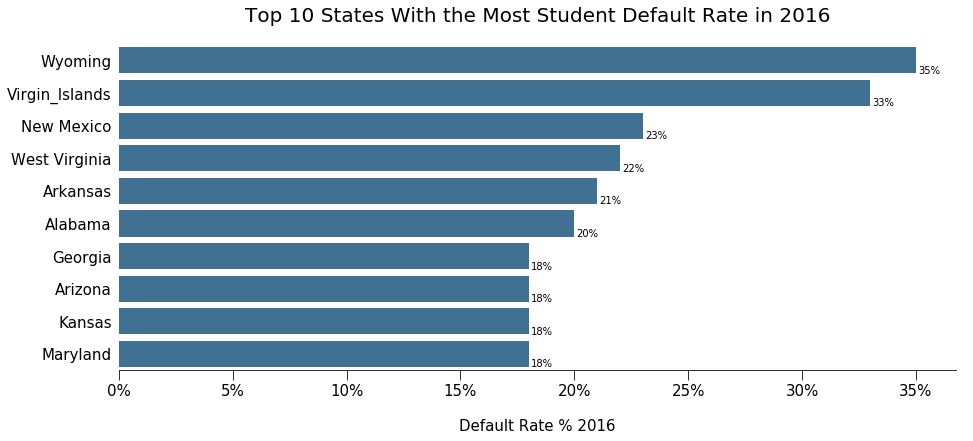

In [314]:
# initialize the matplotlib figure
fig, ax = plt.subplots(figsize = (15,6))
fig.patch.set(facecolor='white')

# graph bar plot for states with most money in default 
graph = sns.barplot(data=most_default_states, x='default rate %', y='index',
                    color='#3274A1')

ax.set_xlabel('Default Rate % 2016', fontsize = 15, labelpad=20)
ax.set_ylabel('')
ax.set_title('Top 10 States With the Most Student Default Rate in 2016',
             y = 1.05, fontsize=20)

# remove spine
sns.despine(left=True, bottom=False)

#set y and x tick labels
ax.set_xticklabels(labels=['0%', '5%', '10%', '15%', '20%', '25%', '30%', '35%'],
                   fontsize=15)

ax.set_yticklabels(labels=['Wyoming', 'Virgin_Islands', 'New Mexico', 
                           'West Virginia', 'Arkansas', 'Alabama', 
                           'Georgia', 'Arizona', 'Kansas', 'Maryland'],
                   fontsize=15)

# set tick parameters
ax.tick_params(axis = 'x', length=10)

ax.tick_params(left=False)

# Function to add label at the end of the bar graph
def show_values_on_bars(axs, h_v="v", space=0.4):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = '{}%'.format(int(p.get_width()))
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)


# adding numbers at the end of
show_values_on_bars(graph, 'h', 0.1)

plt.show();


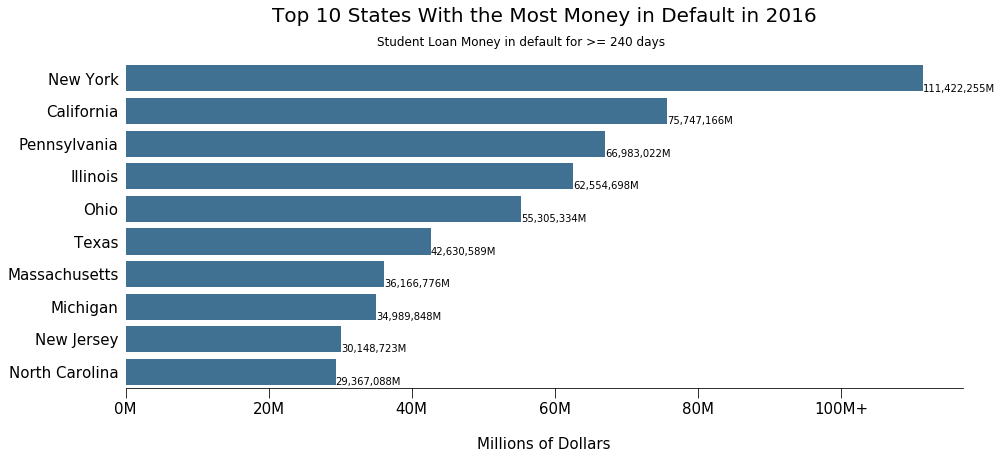

In [315]:
# initialize the matplotlib figure
fig, ax = plt.subplots(figsize = (15,6))
fig.patch.set(facecolor='white')

# graph bar plot for states with most student default rate. 
graph = sns.barplot(data=most_money_default_states, 
                    x='total default money >= 8 months', 
                    y='index', color='#3274A1')

ax.set_xlabel('Millions of Dollars', fontsize = 15, labelpad=20)
ax.set_ylabel('')
ax.set_title('Top 10 States With the Most Money in Default in 2016',
             pad=40, fontsize=20, )

# remove spine
sns.despine(left=True, bottom=False)

# set y and x tick labels

ax.set_xticklabels(labels=['0M', '20M', '40M', '60M', '80M', '100M+', '100M+'],
                   fontsize=15)

ax.set_yticklabels(labels=['New York', 'California', 'Pennsylvania', 
                           'Illinois', 'Ohio', 'Texas', 'Massachusetts', 
                           'Michigan', 'New Jersey', 'North Carolina'],
                   fontsize=15)

# set tick parameters
ax.tick_params(axis = 'x', length=10)

ax.tick_params(left=False)

# Function to add label at the end of the bar graph
def show_values_on_bars(axs, h_v="v", space=1):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = '{:,}M'.format(int(p.get_width()))
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)


# adding numbers at the end of
show_values_on_bars(graph, 'h', 2)

ax.text(x=0.3,y=1.05, s='Student Loan Money in default for >= 240 days',
        fontsize = 12, transform=ax.transAxes)

plt.show();


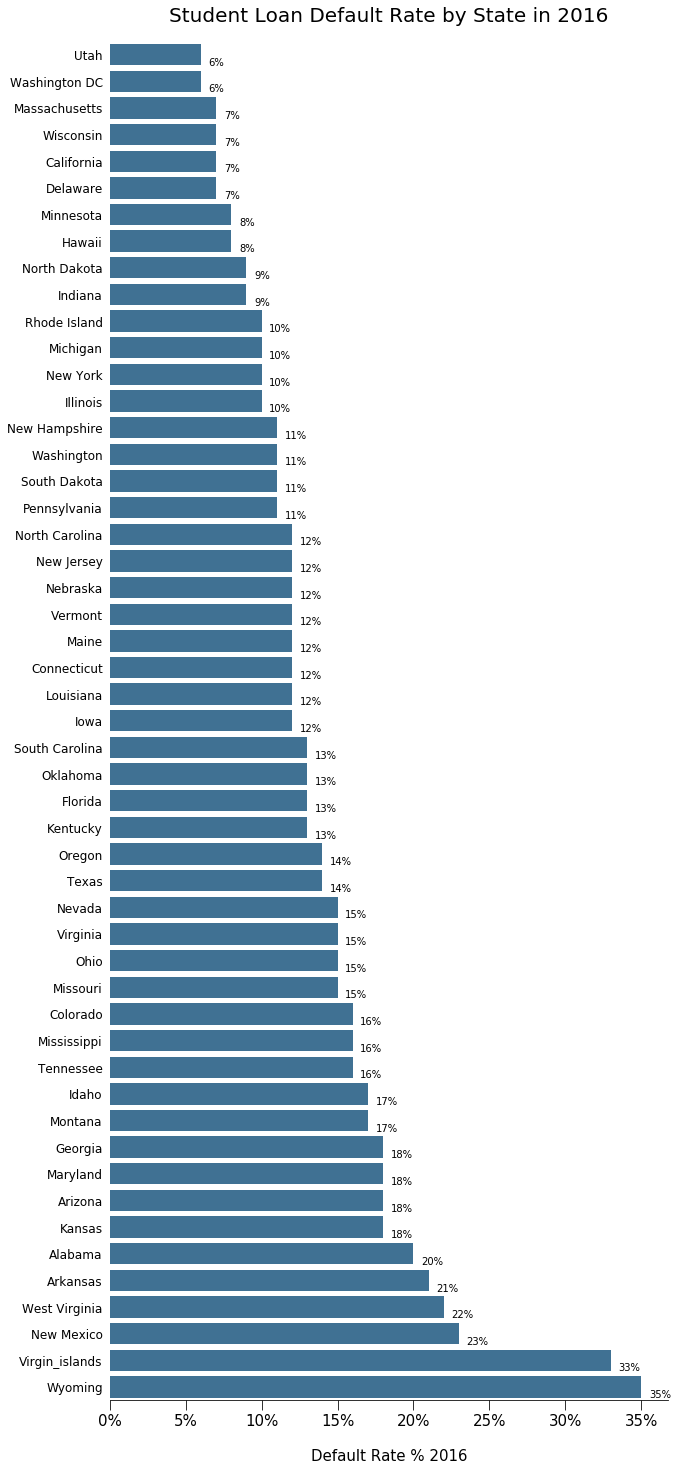

In [353]:
# initialize the matplotlib figure
fig, ax = plt.subplots(figsize = (10,25))
fig.patch.set(facecolor='white')

# graph bar plot for states with most money in default 
graph = sns.barplot(data=all_states.sort_values(by='default rate %',
                                                ascending=True),
                    x='default rate %', y='index', 
                    color='#3274A1')

ax.set_xlabel('Default Rate % 2016', fontsize = 15, labelpad=20)
ax.set_ylabel('')
ax.set_title('Student Loan Default Rate by State in 2016',
             y = 1.01, fontsize=20)

# remove spine
sns.despine(left=True, bottom=False)

#set y and x tick labels
ax.set_xticklabels(labels=['0%', '5%', '10%', '15%', '20%', '25%', '30%', '35%'],
                   fontsize=15)

#ax.set_yticklabels(labels=[''], fontsize=15)

# set tick parameters
ax.tick_params(axis = 'x', length=10)

ax.tick_params(left=False)

ax.tick_params(which='major', axis='y', labelsize=12)

# Function to add label at the end of the bar graph
def show_values_on_bars(axs, h_v="v", space=0.4):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = '{}%'.format(int(p.get_height()))
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = '{}%'.format(int(p.get_width()))
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)


# adding numbers at the end of
show_values_on_bars(graph, 'h', 0.5)

plt.show();


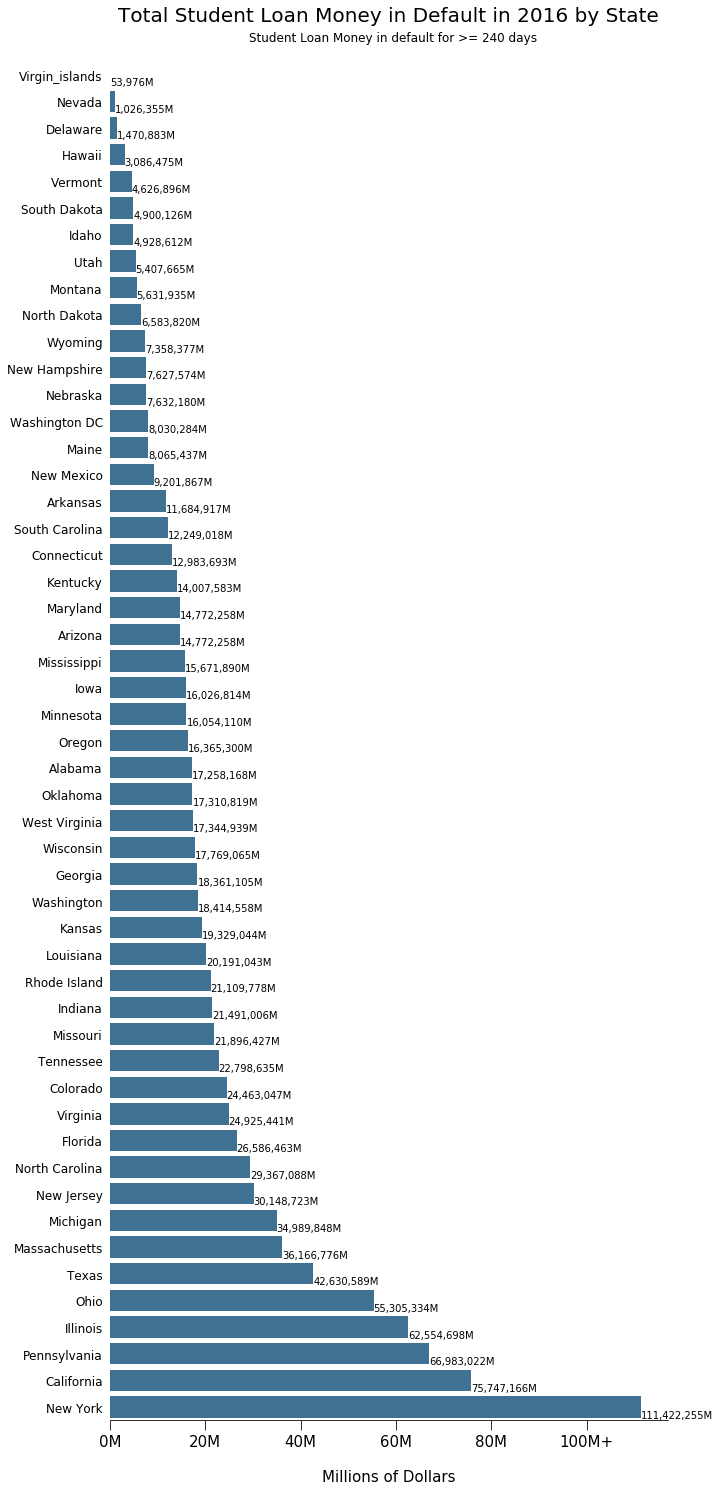

In [357]:
# initialize the matplotlib figure
fig, ax = plt.subplots(figsize = (10,25))
fig.patch.set(facecolor='white')

# graph bar plot for states with most student default rate. 
graph = sns.barplot(data=all_states.sort_values(by='total default money >= 8 months',
                                                ascending=True), 
                    x='total default money >= 8 months', 
                    y='index', color='#3274A1')

ax.set_xlabel('Millions of Dollars', fontsize = 15, labelpad=20)
ax.set_ylabel('')
ax.set_title('Total Student Loan Money in Default in 2016 by State',
             pad=40, fontsize=20, )

# remove spine
sns.despine(left=True, bottom=False)

# set y and x tick labels

ax.set_xticklabels(labels=['0M', '20M', '40M', '60M', '80M', '100M+', '100M+'],
                   fontsize=15)

#ax.set_yticklabels(labels=['New York', 'California', 'Pennsylvania', 
                           #'Illinois', 'Ohio', 'Texas', 'Massachusetts', 
                           #'Michigan', 'New Jersey', 'North Carolina'],
                   #fontsize=15)

# set tick parameters
ax.tick_params(axis = 'x', length=10)

ax.tick_params(left=False)

ax.tick_params(axis = 'y', which='major', labelsize=12)

# Function to add label at the end of the bar graph
def show_values_on_bars(axs, h_v="v", space=1):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = '{:,}M'.format(int(p.get_width()))
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)


# adding numbers at the end of
show_values_on_bars(graph, 'h', 2)

ax.text(x=0.25,y=1.015, s='Student Loan Money in default for >= 240 days',
        fontsize = 12, transform=ax.transAxes)

plt.show();


In [0]:
# adding states in abbreviation format so that i can use it in USA Area map. 

all_states['state abbv'] = ['AL', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 
                            'DC', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 
                            'IA', 'KS','KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS',
                             'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 
                             'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 
                             'SD', 'TN', 'TX','UT', 'VT', 'VA', 'WA', 'WV',
                             'WI', 'WY', 'VI']
                          

In [0]:
all_states = all_states.drop(['state abbv.'], axis=1)

In [383]:
all_states.head()

,index,total borrowers,default borrowers,default rate %,total default >= 8 months,total default money >= 8 months,state abbv
0,Alabama,3060,625,20,10626,17258168,AL
1,Arizona,1660,299,18,5828,14772258,AZ
2,Arkansas,1840,386,21,5640,11684917,AR
3,California,25506,1855,7,29633,75747166,CA
4,Colorado,4136,669,16,9173,24463047,CO


In [385]:
# Plotting the student loan default rate using Map of the United States

import plotly.express as px  # Be sure to import express
fig = px.choropleth(all_states,  # Input Pandas DataFrame
                    locations="state abbv",  # DataFrame column with locations
                    color="default rate %",  # DataFrame column with color values
                    hover_name="default rate %", # DataFrame column hover info
                    locationmode = 'USA-states') # Set to plot as US States
fig.update_layout(
    title_text = 'Student Loan Default Rate By State in 2016', # Create a Title
    geo_scope='usa',  # Plot only the USA instead of globe
)
fig.show()  # Output the plot to the screen

In [386]:
# Plotting how much money is in default using Map of the United States

import plotly.express as px  # Be sure to import express
fig = px.choropleth(all_states,  # Input Pandas DataFrame
                    locations="state abbv",  # DataFrame column with locations
                    color="total default money >= 8 months",  # DataFrame column with color values
                    hover_name="total default money >= 8 months", # DataFrame column hover info
                    locationmode = 'USA-states') # Set to plot as US States
fig.update_layout(
    title_text = 'How Much Money is in Default for 240 days or More in Each State in 2016', # Create a Title
    geo_scope='usa',  # Plot only the USA instead of globe
)
fig.show()  # Output the plot to the screen